## fitting sin 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.matlib import repmat
from jupyter_notebook.datasets.base import Dataset
from jupyter_notebook.models.utils.training import train_model_keras

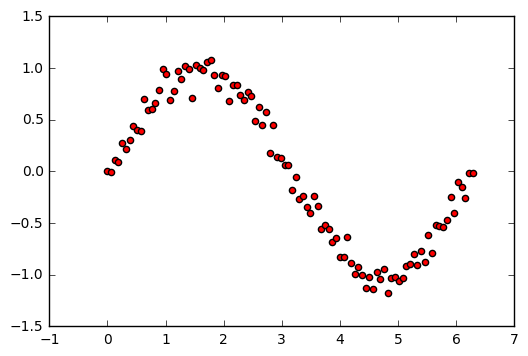

In [5]:
class SinImpoter(object):
   
    def load_dataset(self):
        n_samples=100
        x = np.linspace(0, 2*np.pi, n_samples).reshape(n_samples, 1)
        y = np.sin(x) + np.random.randn(x.shape[0], 1)*0.1
        data = [x]
        labels = y
        
        self.data = data
        self.labels = labels
    
    def output(self):
        return self.data, self.labels

sin_importer = SinImpoter()
dataset = Dataset()
dataset.load_importer(sin_importer)
x, y = dataset.data[0], dataset.labels
plt.scatter(x[:, 0], y[:, 0], c='r')
plt.show()

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD, RMSprop
from keras.callbacks import Callback

Using TensorFlow backend.


In [9]:
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.records = []
    
    def on_epoch_end(self, epoch, logs={}):
        record_metrics = (logs.get('loss'), logs.get('acc'), logs.get('val_loss'), logs.get('val_acc'))
        self.records.append(record_metrics)

In [15]:
def build_model():
    model = Sequential()
    model.add(Dense(output_dim=3, input_dim=1, activation='tanh'))
    model.add(Dense(output_dim=1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='sgd')
    #model.fit(X_train, y_train, nb_epoch=nb_epoch, callbacks=callbacks)
    return model

In [25]:
nb_batches = 1000; nb_epoch = 30
model = build_model()
loss_metrics_dict = train_model_keras(model, train_dataset=dataset, nb_epoch=nb_epoch, nb_batches=nb_batches)

0/30, train: 0.736732780933, valid: []
1/30, train: 0.179565653205, valid: []
2/30, train: 0.112011536956, valid: []
3/30, train: 0.0732690393925, valid: []
4/30, train: 0.0638837814331, valid: []
5/30, train: 0.0607553087175, valid: []
6/30, train: 0.0591200217605, valid: []
7/30, train: 0.0579376257956, valid: []
8/30, train: 0.0570703968406, valid: []
9/30, train: 0.0564312934875, valid: []
10/30, train: 0.055967092514, valid: []
11/30, train: 0.0555591247976, valid: []
12/30, train: 0.055243588984, valid: []
13/30, train: 0.0549133121967, valid: []
14/30, train: 0.0549728162587, valid: []
15/30, train: 0.0543178655207, valid: []
16/30, train: 0.0541993752122, valid: []
17/30, train: 0.0545043572783, valid: []
18/30, train: 0.0535378456116, valid: []
19/30, train: 0.0531539916992, valid: []
20/30, train: 0.0529238693416, valid: []
21/30, train: 0.0528027638793, valid: []
22/30, train: 0.0522874817252, valid: []
23/30, train: 0.0526116937399, valid: []
24/30, train: 0.0515394210815, 

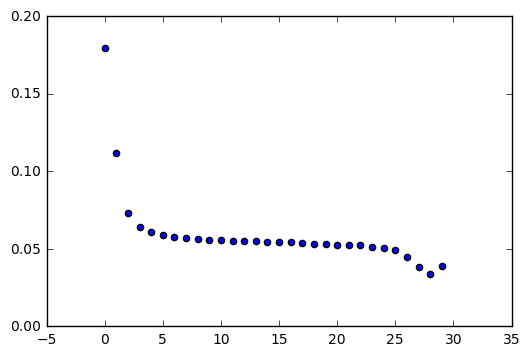

In [26]:
train_loss_metrics = loss_metrics_dict['train_loss_metrics']
plt.scatter(range(len(train_loss_metrics)), train_loss_metrics)
plt.show()

(150, 1)


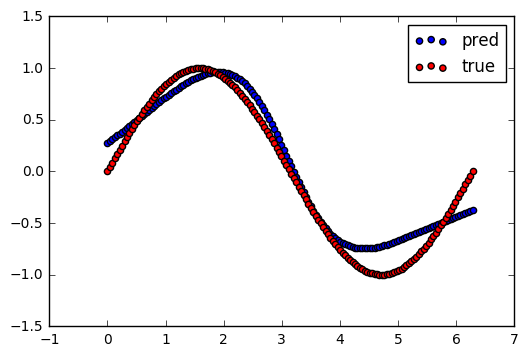

In [27]:
x_test = np.linspace(0, 2*np.pi, 150).reshape(150, 1)
y_true = np.sin(x_test)
y_pred = model.predict(x_test)
print y_pred.shape

plt.scatter(x_test[:, 0], y_pred[:, 0], label='pred')
plt.scatter(x_test[:, 0], y_true[:, 0], c='r', label='true')
plt.legend()
plt.show()

### classification

(400, 2) (400, 2)


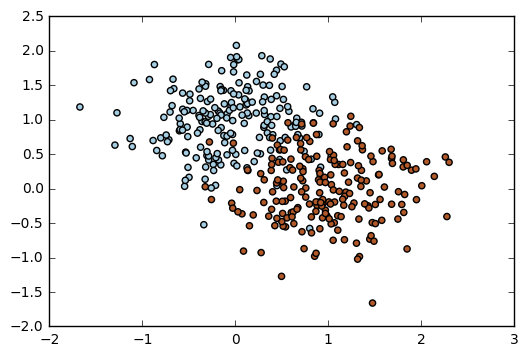

In [32]:
class DataImpoter(object):
    def load_dataset(self):
        n_samples = 200
        x1 = np.random.randn(n_samples, 2) * 0.5 + np.asarray([[0, 1]])
        x2 = np.random.randn(n_samples, 2) * 0.5 + np.asarray([[1, 0]])
        y1 = np.asarray([[1, 0] for ii in range(len(x1))])
        y2 = np.asarray([[0, 1] for ii in range(len(x2))])
        X_train = np.concatenate([x1, x2], axis=0)
        y_train = np.concatenate([y1, y2], axis=0)
        data = [X_train]
        labels = y_train
        self.data = data
        self.labels = labels
    
    def output(self):
        return self.data, self.labels

data_importer = DataImpoter()
dataset = Dataset()
dataset.load_importer(data_importer)
print dataset.data[0].shape, dataset.labels.shape

X_train, y_train = dataset.data[0], dataset.labels
plt.scatter(X_train[:, 0], X_train[:, 1], c=np.argmax(y_train, axis=1), cmap=plt.cm.Paired)
plt.savefig('./classify.jpg')
plt.show()

In [43]:
def build_model():
    model = Sequential()
    model.add(Dense(output_dim=3, input_dim=2, activation='tanh'))
    model.add(Dense(output_dim=2, activation='sigmoid'))
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = build_model()
nb_epoch = 30; nb_batches = 100
loss_metrics_dict = train_model_keras(model, train_dataset=dataset, nb_epoch=nb_epoch, nb_batches=nb_batches)

0/30, train: [ 0.80360609  0.49250001], valid: []
1/30, train: [ 0.67073941  0.59249997], valid: []
2/30, train: [ 0.58333349  0.72000003], valid: []
3/30, train: [ 0.51240706  0.8175    ], valid: []
4/30, train: [ 0.44636539  0.8775    ], valid: []
5/30, train: [ 0.38682204  0.89749998], valid: []
6/30, train: [ 0.3374472   0.89999998], valid: []
7/30, train: [ 0.296841    0.91000003], valid: []
8/30, train: [ 0.26525387  0.92000002], valid: []
9/30, train: [ 0.24183156  0.92000002], valid: []
10/30, train: [ 0.22381416  0.92250001], valid: []
11/30, train: [ 0.21098401  0.935     ], valid: []
12/30, train: [ 0.2018124  0.935    ], valid: []
13/30, train: [ 0.19510147  0.92750001], valid: []
14/30, train: [ 0.19052818  0.92750001], valid: []
15/30, train: [ 0.18732697  0.92750001], valid: []
16/30, train: [ 0.18503214  0.93000001], valid: []
17/30, train: [ 0.18321016  0.9325    ], valid: []
18/30, train: [ 0.18200542  0.9325    ], valid: []
19/30, train: [ 0.18124333  0.9325    ], va

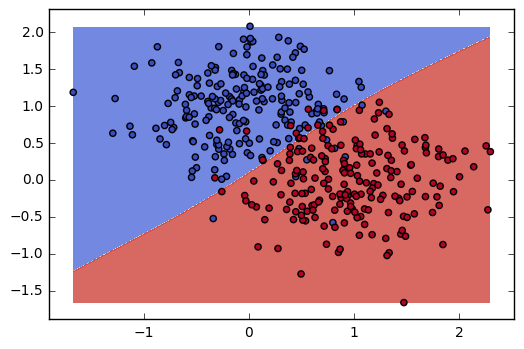

In [44]:
def contourf_plot(box, h, model, dataset):
    x_min, x_max, y_min, y_max = box
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    X, y = dataset.data[0], dataset.labels
    y = np.argmax(y, axis=1)
    
    x_y = np.c_[xx.ravel(), yy.ravel()]
    assert len(x_y.shape) == len(dataset.data[0].shape), 'shapes: {0} and {1} received.'.format(x_y.shape, dataset.data[0].shape)
    zz = np.argmax(model.predict(x_y), axis=1)
    zz = zz.reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.show()

x_min, x_max = dataset.data[0][:, 0].min(), dataset.data[0][:, 0].max()
y_min, y_max = dataset.data[0][:, 1].min(), dataset.data[0][:, 1].max()
box = [x_min, x_max, y_min, y_max]
h = 0.01
contourf_plot(box, h, model, dataset)